<a href="https://colab.research.google.com/github/ccbeltran/Talento_Tech/blob/main/ACP_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import io
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

In [8]:
# Obtener la URL del archivo de Excel en Google Drive
Ruta = '/content/Acp_carros.xlsx'  # Reemplaza 'ID_DEL_ARCHIVO'

# Leer el archivo de Excel en un DataFrame
Bcarros = pd.read_excel(Ruta, sheet_name='Hoja3')
Bcarros.head(7)

,Marcas,Elegancia,Comodidad,Deportividad,Rendimiento,Seguridad
0,Mazda,7.0,4.6,6.5,8.3,5.5
1,Renault,3.5,6.5,5.7,2.8,6.0
2,Chevrolet,4.2,5.0,4.3,8.0,2.0
3,Toyota,5.6,5.0,4.6,7.0,4.0
4,Suzuki,8.7,9.0,6.5,6.0,9.0
5,Honda,9.0,7.0,7.7,5.0,7.0
6,Kia,7.0,6.0,5.0,8.0,7.0


In [9]:
X_selected = Bcarros[["Elegancia", "Comodidad", "Deportividad", "Rendimiento", "Seguridad" ]]
X_selected

,Elegancia,Comodidad,Deportividad,Rendimiento,Seguridad
0,7.0,4.6,6.5,8.3,5.5
1,3.5,6.5,5.7,2.8,6.0
2,4.2,5.0,4.3,8.0,2.0
3,5.6,5.0,4.6,7.0,4.0
4,8.7,9.0,6.5,6.0,9.0
5,9.0,7.0,7.7,5.0,7.0
6,7.0,6.0,5.0,8.0,7.0


In [10]:
from sklearn.preprocessing import StandardScaler

# Crea el scaler
scaler = StandardScaler()

# Ajusta y transforma los datos
standardized_data = scaler.fit_transform(X_selected)

print(standardized_data)

[[ 0.29283801 -1.09960858  0.65817512  0.99970427 -0.13592553]
 [-1.5007948   0.24211565 -0.05062886 -1.96095838  0.10194415]
 [-1.14206824 -0.81714032 -1.29103581  0.83821358 -1.80101331]
 [-0.42461511 -0.81714032 -1.02523432  0.29991128 -0.84953458]
 [ 1.16403109  2.00754226  0.65817512 -0.23839102  1.52916225]
 [ 1.31777105  0.59520097  1.72138108 -0.77669332  0.57768352]
 [ 0.29283801 -0.11096967 -0.67083233  0.83821358  0.57768352]]


In [11]:
from sklearn.decomposition import PCA

In [12]:

# Crea el objeto PCA sin especificar n_components
pca = PCA()

# Ajusta PCA al conjunto de datos
pca.fit(standardized_data)

# Varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_

# Imprime la varianza explicada
print("Varianza explicada por cada componente principal:", varianza_explicada)

# Suma acumulada de la varianza explicada
varianza_acumulada = varianza_explicada.cumsum()
print("Varianza acumulada:", varianza_acumulada)

# Decidir el número de componentes basado en la varianza acumulada
# Por ejemplo, si queremos conservar el 95% de la varianza
n_components = next(x for x, val in enumerate(varianza_acumulada) if val > 0.95) + 1

print(f"Número de componentes para conservar el 95% de la varianza: {n_components}")

# Ahora, puedes ajustar PCA nuevamente con el número de componentes seleccionado
pca_optimizado = PCA(n_components=n_components)
X_pca_optimizado = pca_optimizado.fit_transform(standardized_data)

# X_pca_optimizado es el conjunto de datos transformado con las dimensiones seleccionadas


Varianza explicada por cada componente principal: [0.62429303 0.2366371  0.10107287 0.02889802 0.00909898]
Varianza acumulada: [0.62429303 0.86093013 0.962003   0.99090102 1.        ]
Número de componentes para conservar el 95% de la varianza: 3


In [13]:
pca = PCA(n_components=2)
X_pcaB = pca.fit_transform(standardized_data)

In [14]:
print(X_pcaB)

[[-0.41931255  1.23491201]
 [-0.00799981 -2.45492972]
 [-2.67782753  0.02467763]
 [-1.59790143  0.05313355]
 [ 2.66704997  0.16213276]
 [ 2.19369412  0.15790782]
 [-0.15770278  0.82216595]]


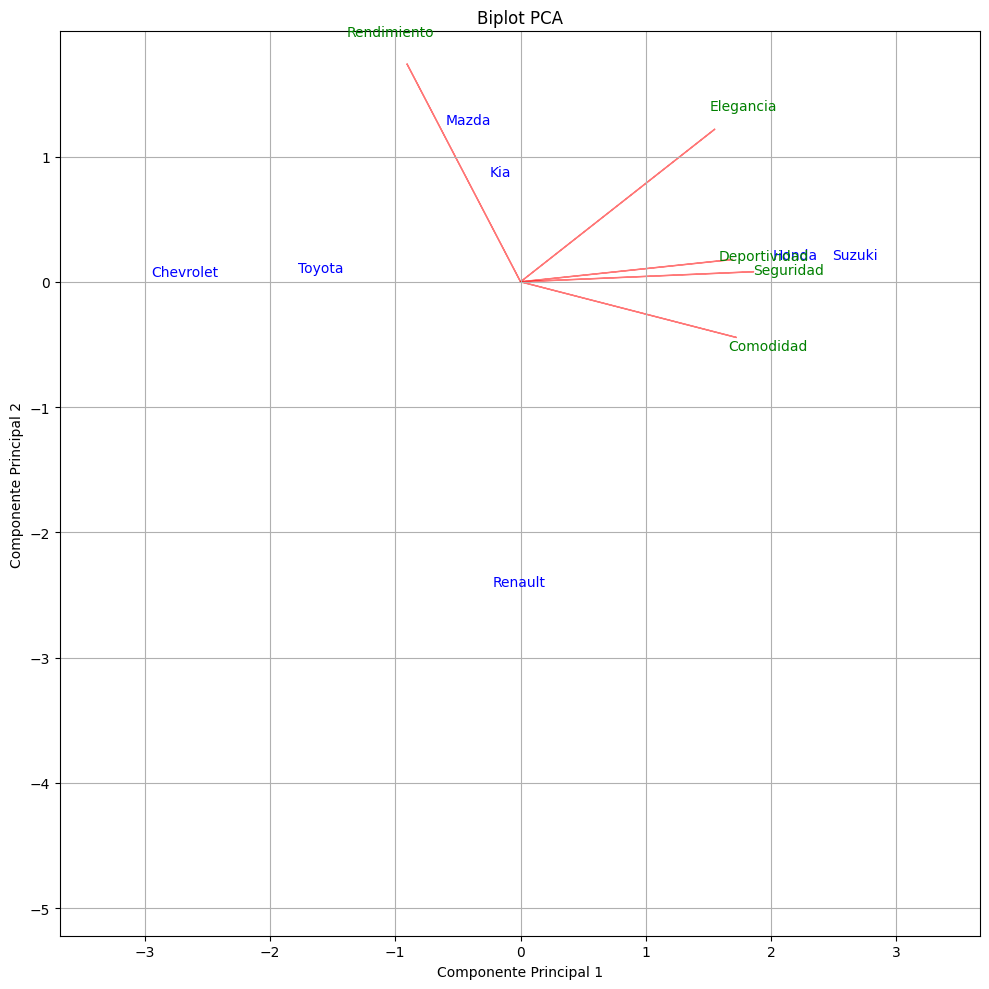

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define scale_factor antes de llamar a la función
scale_factor = np.std(X_pcaB, axis=0) * 2

def biplot_with_labels(score, coeff, labels=None, scale_factor=1, car_names=None):
    plt.figure(figsize=(10, 10))  # Ajuste del tamaño de la figura

    if car_names is not None:
        for i in range(score.shape[0]):
            plt.text(score[i, 0], score[i, 1], car_names[i], color='blue', ha='center', va='bottom')

    for i in range(coeff.shape[0]):
        scaled_coeff = coeff[i, :] * scale_factor
        plt.arrow(0, 0, scaled_coeff[0], scaled_coeff[1], color='r', alpha=0.5)
        if labels is None:
            plt.text(scaled_coeff[0]*1.15, scaled_coeff[1]*1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(scaled_coeff[0]*1.15, scaled_coeff[1]*1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.title("Biplot PCA")
    plt.grid(True)
    plt.axis('equal')
    plt.xlim([score[:,0].min()-1, score[:,0].max()+1])  # Ajustar límites
    plt.ylim([score[:,1].min()-3, score[:,1].max()+1])
    plt.tight_layout()
    plt.show()

# Llamar a la función aquí con tus datos
biplot_with_labels(X_pcaB, np.transpose(pca.components_), labels=X_selected.columns, scale_factor=scale_factor, car_names=Bcarros['Marcas'])